In [2]:
# Set up environment

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

%matplotlib inline

In [3]:
# Load data

file = 'V2_Cleaned_Baseline_Diabetes.csv'
base = pd.read_csv(file,na_values=[-999,'999',-888,'-888'])
base.shape
base.columns.values

(62, 109)

array(['ParticipantID', 'SurveyDate', 'UserLanguage',
       'Duration (in seconds)', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5',
       'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q7_4', 'Q7_5', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q13_2_TEXT', 'Q14', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5',
       'Q15_6', 'Q15_7', 'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12',
       'Q15_13', 'Q15_14', 'Q15_15', 'Q15_16', 'Q15_17', 'Q15_18',
       'Q15_19', 'Q15_20', 'Q15_21', 'Q15_22', 'Q15_23', 'Q15_24',
       'Q15_25', 'Q15_26', 'Q15_27', 'Q15_28', 'Q15_29', 'Q16_1', 'Q16_2',
       'Q16_3', 'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9',
       'Q16_10', 'Q16_11', 'Q16_12', 'Q16_13', 'Q16_14', 'Q16_15',
       'Q16_16', 'Q16_17', 'Q16_18', 'Q16_19', 'Q16_20', 'Q16_21',
       'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7',
       'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q18',
       'Q32', 'Q19', 'Q20',

In [3]:
#Health information resources

In [4]:
Q3_idx = ['None','A little','A good amount','A lot']
Q3_cols = ['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5']
Q3_dict = {1:"None", 2:"A little", 3:"A good amount", 4:"A lot"}
Q3_cat = ['Health care providers','Family and friends','Internet/websites',
          'Written resources','Community organizations and events']
Q3_1 = list(base['Q3_1'].value_counts().sort_index())
Q3_2 = list(base['Q3_2'].value_counts().sort_index())
Q3_3 = list(base['Q3_3'].value_counts().sort_index())
Q3_4 = list(base['Q3_4'].value_counts().sort_index())
Q3_5 = list(base['Q3_5'].value_counts().sort_index())

for i in range(5):
    
    print(Q3_cat[i])
    print(base[Q3_cols[i]].value_counts().sum())
    base[Q3_cols[i]].value_counts(normalize=True).sort_index().rename(Q3_dict)
    print()

Health care providers
60


None             0.25
A little         0.35
A good amount    0.25
A lot            0.15
Name: Q3_1, dtype: float64


Family and friends
58


None             0.310345
A little         0.344828
A good amount    0.172414
A lot            0.172414
Name: Q3_2, dtype: float64


Internet/websites
58


None             0.465517
A little         0.327586
A good amount    0.137931
A lot            0.068966
Name: Q3_3, dtype: float64


Written resources
58


None             0.310345
A little         0.344828
A good amount    0.224138
A lot            0.120690
Name: Q3_4, dtype: float64


Community organizations and events
59


None             0.355932
A little         0.406780
A good amount    0.186441
A lot            0.050847
Name: Q3_5, dtype: float64

<BarContainer object of 4 artists>

Text(0, 0.5, '# of participants')

Text(0.5, 1.0, 'Information from Health care providers')

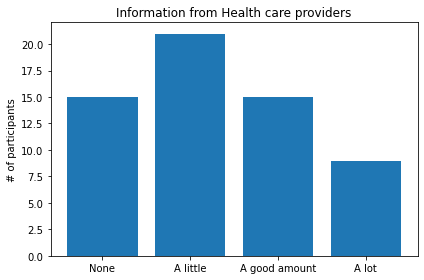

In [5]:
# Plot for Q3
plt.bar(Q3_idx,Q3_1)
plt.ylabel('# of participants')
plt.title('Information from Health care providers')
plt.tight_layout()



<BarContainer object of 4 artists>

Text(0, 0.5, '# of participants')

Text(0.5, 1.0, 'Information from Family and Friends')

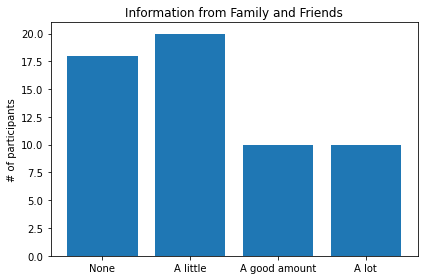

In [6]:
plt.bar(Q3_idx,Q3_2)
plt.ylabel('# of participants')
plt.title('Information from Family and Friends')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0, 0.5, '# of participants')

Text(0.5, 1.0, 'Information from Internet/websites')

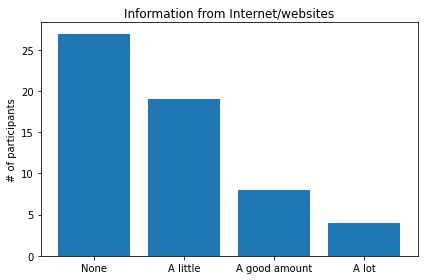

In [7]:
plt.bar(Q3_idx,Q3_3)
plt.ylabel('# of participants')
plt.title('Information from Internet/websites')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0, 0.5, '# of participants')

Text(0.5, 1.0, 'Information from Written Resources')

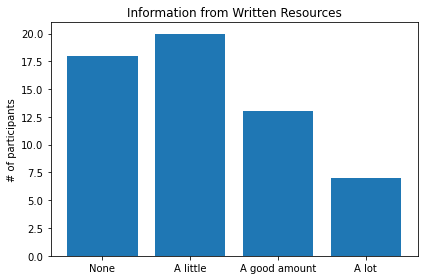

In [8]:
plt.bar(Q3_idx,Q3_4)
plt.ylabel('# of participants')
plt.title('Information from Written Resources')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0, 0.5, '# of participants')

Text(0.5, 1.0, 'Information from Community Organizations and Events')

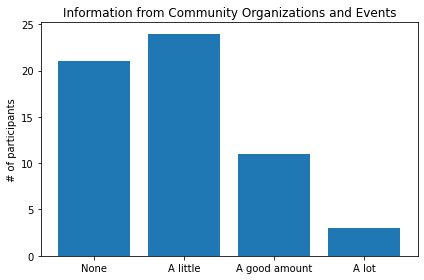

In [9]:
plt.bar(Q3_idx,Q3_5)
plt.ylabel('# of participants')
plt.title('Information from Community Organizations and Events')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x7fb3b4e67730>,
 [Text(0.8346339501101788, 0.7165097133490095, 'Yes'),
  Text(-0.8346340171946562, -0.716509635204936, 'No')],
 [Text(0.4552548818782793, 0.39082348000855055, '22.6%'),
  Text(-0.4552549184698124, -0.39082343738451053, '77.4%')])

Text(0.5, 1.0, 'Do you have other major souces of diabetes information?')

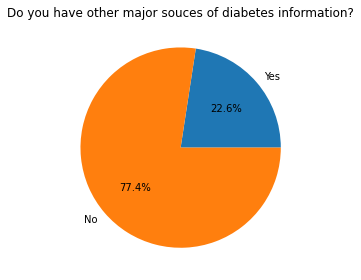

In [10]:
# Q4:
Q4_idx = ['Yes','No']
Q4 = list(base['Q4'].value_counts(normalize=True).sort_index())

plt.pie(Q4,labels=Q4_idx,autopct='%1.1f%%')
plt.title('Do you have other major souces of diabetes information?')
plt.tight_layout()

In [11]:
# Q6 - Satisfaction with diabetes information

Q6_idx = ['Very unsatisfied','Unsatisfied','Neutral','Satisfied','Very satisfied',
         'Not applicable']
Q6_cols = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5']
Q6_dict = {1:"Very unsatisfied", 2:"Unsatisfied", 
           3:"Neutral", 4:"Satisfied", 5:"Very satisfied", 6: "Not applicable"}
Q6_cat = ['Health care providers','Family and friends','Internet/websites',
          'Written resources','Community organizations and events']
Q6_1 = list(base['Q6_1'].value_counts().sort_index())
Q6_2 = list(base['Q6_2'].value_counts().sort_index())
Q6_3 = list(base['Q6_3'].value_counts().sort_index())
Q6_4 = list(base['Q6_4'].value_counts().sort_index())
Q6_5 = list(base['Q6_5'].value_counts().sort_index())

for i in range(5):
    
    print(Q6_cat[i])
    print(base[Q6_cols[i]].value_counts().sum())
    base[Q6_cols[i]].value_counts(normalize=True).sort_index().rename(Q6_dict)
    print()


Health care providers
53


Very unsatisfied    0.056604
Unsatisfied         0.094340
Neutral             0.283019
Satisfied           0.396226
Very satisfied      0.169811
Name: Q6_1, dtype: float64


Family and friends
49


Very unsatisfied    0.061224
Unsatisfied         0.081633
Neutral             0.387755
Satisfied           0.387755
Very satisfied      0.081633
Name: Q6_2, dtype: float64


Internet/websites
43


Very unsatisfied    0.139535
Unsatisfied         0.093023
Neutral             0.441860
Satisfied           0.302326
Very satisfied      0.023256
Name: Q6_3, dtype: float64


Written resources
47


Very unsatisfied    0.063830
Unsatisfied         0.042553
Neutral             0.319149
Satisfied           0.468085
Very satisfied      0.106383
Name: Q6_4, dtype: float64


Community organizations and events
47


Very unsatisfied    0.106383
Unsatisfied         0.042553
Neutral             0.297872
Satisfied           0.361702
Very satisfied      0.191489
Name: Q6_5, dtype: float64

<BarContainer object of 6 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Satisfaction with Information from Health care providers')

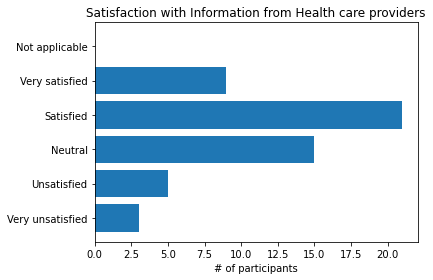

In [12]:
# Plot for Q6

Q6_1.append(0)
plt.barh(Q6_idx,Q6_1)
plt.xlabel('# of participants')
plt.title('Satisfaction with Information from Health care providers')
plt.tight_layout()

<BarContainer object of 6 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Satisfaction with Information from Family and Friends')

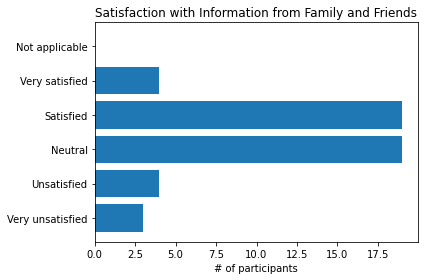

In [13]:
Q6_2.append(0)
plt.barh(Q6_idx,Q6_2)
plt.xlabel('# of participants')
plt.title('Satisfaction with Information from Family and Friends')
plt.tight_layout()

<BarContainer object of 6 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Satisfaction with Information from Internet/websites')

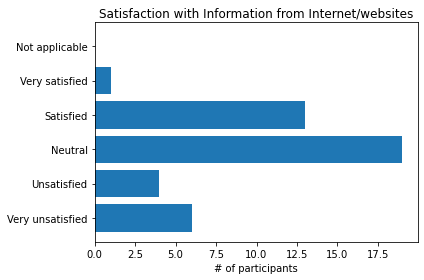

In [14]:
Q6_3.append(0)
plt.barh(Q6_idx,Q6_3)
plt.xlabel('# of participants')
plt.title('Satisfaction with Information from Internet/websites')
plt.tight_layout()

<BarContainer object of 6 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Satisfaction with Written Resources')

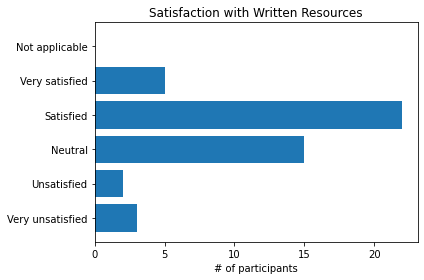

In [15]:
Q6_4.append(0)
plt.barh(Q6_idx,Q6_4)
plt.xlabel('# of participants')
plt.title('Satisfaction with Written Resources')
plt.tight_layout()

<BarContainer object of 6 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Satisfaction with Information from Community Organizations and Events')

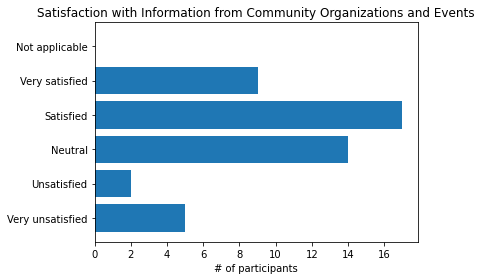

In [16]:
Q6_5.append(0)
plt.barh(Q6_idx,Q6_5)
plt.xlabel('# of participants')
plt.title('Satisfaction with Information from Community Organizations and Events')
plt.tight_layout()

In [17]:
# Q7 - Typical internet use

Q7_idx = ['Daily','A few times a week','A few times a month',
          'A few times a year or less']
Q7_cols = ['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4','Q7_5']
Q7_dict = {1:"Daily", 2:"A few times a week", 
           3:"A few times a month", 4:"A few times a year or less"}
Q7_cat = ['Use a computer','Use the internet','Shop online',
          'Use social media','Look for health information']
Q7_1 = list(base['Q7_1'].value_counts().sort_index())
Q7_2 = list(base['Q7_2'].value_counts().sort_index())
Q7_3 = list(base['Q7_3'].value_counts().sort_index())
Q7_4 = list(base['Q7_4'].value_counts().sort_index())
Q7_5 = list(base['Q7_5'].value_counts().sort_index())

for i in range(5):
    
    print(Q7_cat[i])
    print(base[Q7_cols[i]].value_counts().sum())
    base[Q7_cols[i]].value_counts(normalize=True).rename(Q7_dict)
    print()


Use a computer
59


A few times a year or less    0.305085
A few times a week            0.254237
A few times a month           0.220339
Daily                         0.220339
Name: Q7_1, dtype: float64


Use the internet
57


A few times a year or less    0.350877
Daily                         0.280702
A few times a month           0.210526
A few times a week            0.157895
Name: Q7_2, dtype: float64


Shop online
54


A few times a year or less    0.555556
A few times a month           0.333333
A few times a week            0.055556
Daily                         0.055556
Name: Q7_3, dtype: float64


Use social media
58


Daily                         0.379310
A few times a year or less    0.327586
A few times a week            0.241379
A few times a month           0.051724
Name: Q7_4, dtype: float64


Look for health information
58


A few times a month           0.344828
A few times a year or less    0.310345
A few times a week            0.275862
Daily                         0.068966
Name: Q7_5, dtype: float64

<BarContainer object of 4 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Typical Use of Computer')

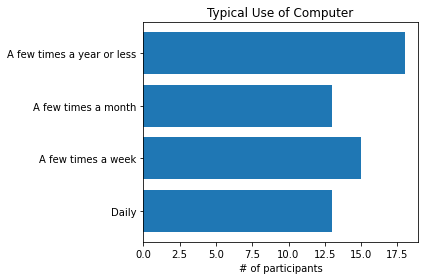

In [18]:
# Plot for Q7

plt.barh(Q7_idx,Q7_1)
plt.xlabel('# of participants')
plt.title('Typical Use of Computer')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Typical Use of Internet')

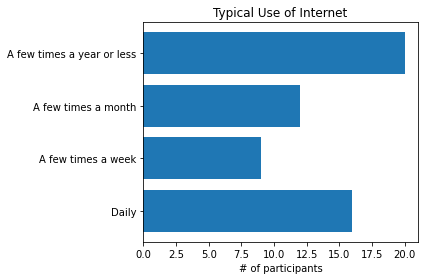

In [19]:
#plt.barh(Q7_2)
#plt.xlabel('# of participants')
#plt.title('Typical Use of Internet')
#plt.tight_layout()

plt.barh(Q7_idx,Q7_2)
plt.xlabel('# of participants')
plt.title('Typical Use of Internet')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Shopping online')

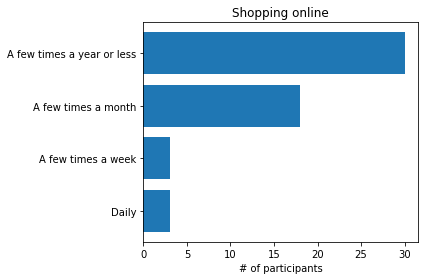

In [20]:
plt.barh(Q7_idx,Q7_3)
plt.xlabel('# of participants')
plt.title('Shopping online')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Typical Use of Social Media')

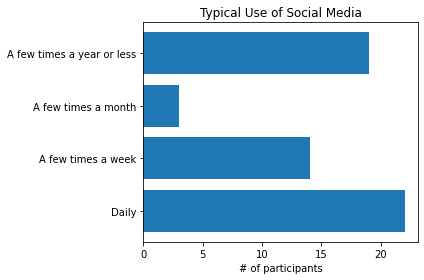

In [21]:
plt.barh(Q7_idx,Q7_4)
plt.xlabel('# of participants')
plt.title('Typical Use of Social Media')
plt.tight_layout()

<BarContainer object of 4 artists>

Text(0.5, 0, '# of participants')

Text(0.5, 1.0, 'Looking for Health Information online')

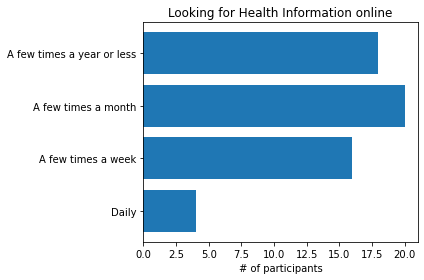

In [22]:
plt.barh(Q7_idx,Q7_5)
plt.xlabel('# of participants')
plt.title('Looking for Health Information online')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x7fb3b623d130>,
 [Text(-1.0873151497178102, 0.16657060123003706, 'Yes'),
  Text(1.0873151419200764, -0.1665706521309327, 'No')],
 [Text(-0.5930809907551692, 0.0908566915800202, '95.2%'),
  Text(0.5930809865018598, -0.09085671934414509, '4.8%')])

Text(0.5, 1.0, 'Do you have a cell phone?')

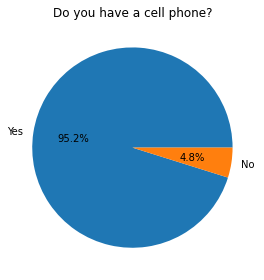

In [23]:
# Q8

Q8_idx = ['Yes','No']
Q8 = list(base['Q8'].value_counts(normalize=True).sort_index())

plt.pie(Q8,labels=Q8_idx,autopct='%1.1f%%')
plt.title('Do you have a cell phone?')
plt.tight_layout()


([<matplotlib.patches.Wedge at 0x7fb3b630d220>,
 [Text(-0.9413593913346188, 0.5690716091548729, 'Smart phone'),
  Text(0.9413593913346187, -0.569071609154873, 'Not a smart phone')],
 [Text(-0.5134687589097919, 0.3104026959026579, '82.7%'),
  Text(0.5134687589097919, -0.31040269590265795, '17.3%')])

Text(0.5, 1.0, 'If yes, what kind of cell phone?')

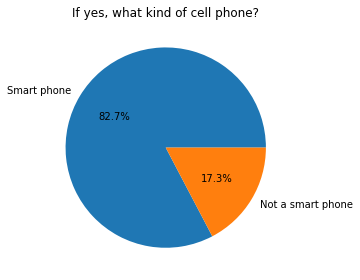

In [24]:
# Q9:
Q9_idx = ['Smart phone','Not a smart phone']
Q9 = list(base['Q9'].value_counts(normalize=True).sort_index())

plt.pie(Q9,labels=Q9_idx,autopct='%1.1f%%')
plt.title('If yes, what kind of cell phone?')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x7fb3b63dc430>,
 [Text(-0.05756949701481712, 1.0984924911047236, 'Yes'),
  Text(0.05756939416652695, -1.0984924964947642, 'No')],
 [Text(-0.03140154382626388, 0.5991777224207583, '51.7%'),
  Text(0.03140148772719651, -0.5991777253607804, '48.3%')])

Text(0.5, 1.0, 'Do you have a computer?')

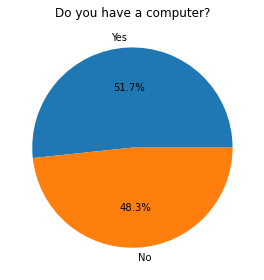

In [25]:
# Q10:
Q10_idx = ['Yes','No']
Q10 = list(base['Q10'].value_counts(normalize=True).sort_index())

plt.pie(Q10,labels=Q10_idx,autopct='%1.1f%%')
plt.title('Do you have a computer?')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x7fb3b648b9d0>,
 [Text(0.2847009827728237, 1.0625184000327659, 'Yes'),
  Text(-0.28470108225297436, -1.0625183733771315, 'No')],
 [Text(0.1552914451488129, 0.5795554909269631, '41.7%'),
  Text(-0.15529149941071327, -0.5795554763875261, '58.3%')])

Text(0.5, 1.0, 'Do you have a tablet?')

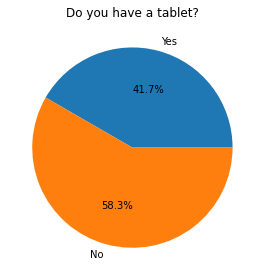

In [26]:
# Q11:
Q11_idx = ['Yes','No']
Q11 = list(base['Q11'].value_counts(normalize=True).sort_index())

plt.pie(Q11,labels=Q11_idx,autopct='%1.1f%%')
plt.title('Do you have a tablet?')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x7fb3b64e9e50>,
 [Text(-0.9281530723111776, 0.5903658817710605, 'Yes'),
  Text(0.9281530170371307, -0.5903659686710202, 'No')],
 [Text(-0.5062653121697333, 0.3220177536933057, '82.0%'),
  Text(0.506265282020253, -0.3220178010932837, '18.0%')])

Text(0.5, 1.0, 'Do you have internet service at home?')

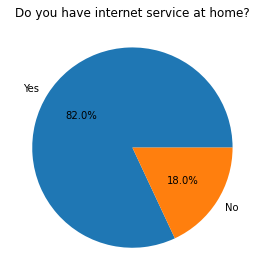

In [27]:
# Q12:
Q12_idx = ['Yes','No']
Q12 = list(base['Q12'].value_counts(normalize=True).sort_index())

plt.pie(Q12,labels=Q12_idx,autopct='%1.1f%%')
plt.title('Do you have internet service at home?')
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x7fb3b6586040>,
 [Text(0.2847009827728237, 1.0625184000327659, 'At Home'),
  Text(-0.28470108225297436, -1.0625183733771315, 'Other')],
 [Text(0.1552914451488129, 0.5795554909269631, '41.7%'),
  Text(-0.15529149941071327, -0.5795554763875261, '58.3%')])

Text(0.5, 1.0, 'Where do you frequently use a computer?')

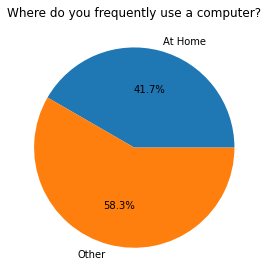

In [28]:
# Q13:
Q13_idx = ['At Home','Other']
Q13 = list(base['Q11'].value_counts(normalize=True).sort_index())

plt.pie(Q13,labels=Q13_idx,autopct='%1.1f%%')
plt.title('Where do you frequently use a computer?')
plt.tight_layout()

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Self-reported Ability to Use Internet')

Text(0, 0.5, '# of participants')

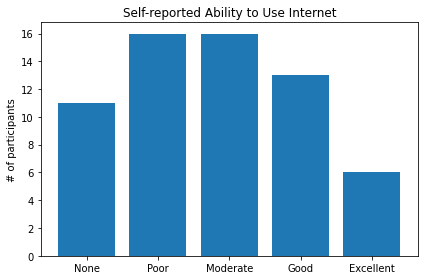

In [29]:
#Q14

Q14_idx = ['None','Poor','Moderate','Good','Excellent']
Q14 = list(base['Q14'].value_counts().sort_index())

plt.bar(Q14_idx,Q14)
plt.title('Self-reported Ability to Use Internet')
plt.ylabel('# of participants')
plt.tight_layout()